In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-12-04 23:10:43.355406: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 23:10:43.359754: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 23:10:43.370238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733350243.387508  100201 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733350243.392404  100201 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 23:10:43.412610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2024-12-04 23:10:47.051653: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1406 - loss: 1.8261
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2058 - loss: 1.7873 - val_accuracy: 0.4323 - val_loss: 1.6608
Epoch 2/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3359 - loss: 1.6463
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3212 - loss: 1.6642 - val_accuracy: 0.4605 - val_loss: 1.5256
Epoch 3/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3906 - loss: 1.5797
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3864 - loss: 1.5522 - val_accuracy: 0.4901 - val_loss: 1.4211
Epoch 4/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3750 - loss: 1.5081
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.4859 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.01099471 0.1198733  0.6805068  0.03388065 0.09658419 0.05816036]
2


# 混同行列

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


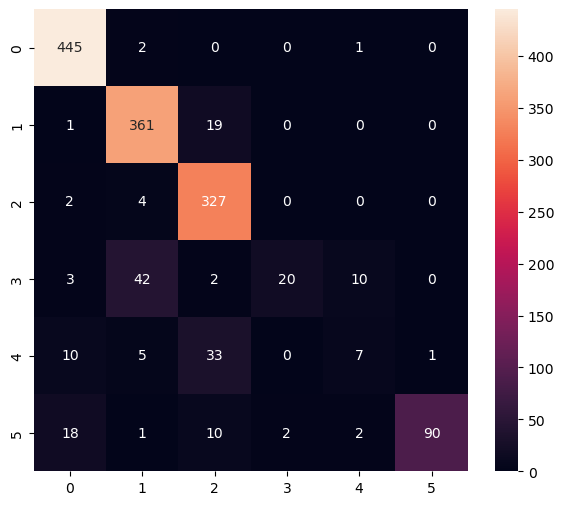

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       448
           1       0.87      0.95      0.91       381
           2       0.84      0.98      0.90       333
           3       0.91      0.26      0.40        77
           4       0.35      0.12      0.18        56
           5       0.99      0.73      0.84       123

    accuracy                           0.88      1418
   macro avg       0.81      0.67      0.70      1418
weighted avg       0.87      0.88      0.86      1418



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpm6hycz7e/assets


INFO:tensorflow:Assets written to: /tmp/tmpm6hycz7e/assets


Saved artifact at '/tmp/tmpm6hycz7e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  140256214487632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140256214498960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140256214490320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140256214491280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140256214488400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140256214489168: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1733350274.703769  100201 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733350274.703795  100201 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-04 23:11:14.704087: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpm6hycz7e
2024-12-04 23:11:14.704700: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-04 23:11:14.704715: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpm6hycz7e
I0000 00:00:1733350274.708962  100201 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-04 23:11:14.709684: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-04 23:11:14.730919: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpm6hycz7e
2024-12-04 23:11:14.737861: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

6644

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 170 μs, sys: 18 μs, total: 188 μs
Wall time: 143 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01099471 0.11987329 0.6805068  0.03388065 0.09658418 0.05816037]
2
